<font size=6  color=#003366> [LEPL1109] - STATISTICS AND DATA SCIENCES <br><br> 
(PART II) TP 03 - Clustering: Discovery of PCA and K-Means   </font> <br><br><br>

<font size=5  color=#003366>
Prof. D. Hainaut<br>
Prof. L. Jacques<br>

<br><br>
Sébastien Colla [SC]    (sebastien.colla@uclouvain.be)<br> 
Anne-Sophie Collin [ASC]   (anne-sophie.collin@uclouvain.be)<br>
Jérome Eertmans [JE]   (jerome.eertmans@uclouvain.be)<br>
Dani Manjah [DM]    (dani.manjah@uclouvain.be)<br> 
Guillaume Van Dessel [GVD] (guillaume.vandessel@uclouvain.be)<br>
Loïc Van Hoorebeeck [LVH]  (loic.vanhoorebeeck@uclouvain.be)<br> 
<div style="text-align: right"> Version 2.1 (2021-09-14)</div>

<br><br>
</font>

<br>
<font size=7 color=#009999> 1. PCA </font> <br><br> 

**Principal Component Analysis** (PCA) is a key instrument for machine learning. It allows to **reduce dimensions** of a data matrix and maximize the **proportion of the variance explained (PVE)** in the obtained reduced data. Reducing the dimension is useful for two main reasons:
<ol>
    <li> Being able to <b>visualize</b> the data. Indeed, ploting high-dimension objects is impossible, and humans can easily analyse 2 or 3 D plots. 
    <li> Having a <b>better input</b> for machine learning models. Indeed, lower-dimension models need less memory and computational efforts. On another hand, as explained in the first exercice session: "Models have increasing risk of overfitting with increasing number of features (curse of dimensionality). Uninformative features then act as noise for the machine learning model that can perform terribly poorly." Using methods as PCA allows to do a <b>feature extraction</b> on the input data!
        
</ol>

<br>
<font size=5 color=#009999> Load data </font> <br>
</font>


Let's reuse the same data as in TP1 (house_prices). Your goal is to determine if the use of k-nearest neighbors is appropriate for evaluating the overall quality of a house.  

<div class="alert alert-warning">
    
<ol>
   <li>In this exercice, we will only consider quantitative features (with type "float" or "integer") and neglect categorical ones. Therefore, you should first import the dataset and remove all unused features (you can use <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html"> select_dtypes</a> for this purpose). <br> <br>
   <li> Remove also the first column that contains the ID of the house. Then, you can remove all rows with missing data.  <br> <br> 
       
   <li> Observe the characteristics of this cleaned dataset (number and type of features) as well as the statistics of at least 10 features. <br><br>
   
   <li>Separate your data from the target (column <code>OverallQual</code>), using for example  <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
"> drop</a>, and scale your dataset. 
</ol>
    
</div> 

In [157]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

data = pd.read_csv("house_prices.csv")
data = data.select_dtypes(include=np.number)
data = data.drop(["Id"],axis=1)
data = data.dropna()
print(data.describe())
print(data.info())
y_obs = data["OverallQual"]
data = data.drop(["OverallQual"],axis=1)
data = preprocessing.scale(data)

        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1121.000000  1121.000000    1121.000000  1121.000000  1121.000000   
mean     56.146298    70.665477   10122.956289     6.212310     5.561106   
std      41.772684    24.266812    8129.302641     1.380822     1.068236   
min      20.000000    21.000000    1300.000000     2.000000     2.000000   
25%      20.000000    60.000000    7590.000000     5.000000     5.000000   
50%      50.000000    70.000000    9416.000000     6.000000     5.000000   
75%      70.000000    80.000000   11361.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1121.000000   1121.000000  1121.000000  1121.000000  1121.000000  ...   
mean   1972.264942   1985.683318   108.487957   438.399643    44.589652  ...   
std      30.967730     21.025974   189.500966   468.385038   157.828725  ..

<br>
<font size=5 color=#009999> 1.2 PCA for visualization </font> <br>
</font>


Even after this first cleaning, it is difficult to observe the dataset and to know whether neighbors have the same overall quality or not. You could observe each features, or observe features by groups of 2 or 3, but this requires a huge amount of work as they are 36 features left, even after cleaning! Moreover, the pair-wise distance between two observations in one feature is not always representative of the pair-wise distance between these two observations in the original features space (two houses can have been built the same year but be very different for all other features, for example).

Nevertheless, there exists a powerful tool to reduce the size of data and make it easier to observe: the Principal Component Analysis (PCA). 

<div class="alert alert-warning">
    
Use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA">PCA</a> from scikit learn to reduce your data to 2 and 3 dimensions. Observe the two obtained datasets. Would you recommend a method based on neighbors? (Do not forget that you only have parts of the observation, as the data was reduced from dimension 36 to 2 or 3!)  
    
</div>   


In [158]:
from sklearn.decomposition import PCA
import plotly.express as px

pca_2d = PCA(n_components=2)
pca_2d.fit(data)

pca_3d = PCA(n_components=3)
pca_3d.fit(data)

X_data2 = pca_2d.transform(data)

X_data3 = pca_3d.transform(data)


fig = px.scatter(x=X_data2[:, 0], y=X_data2[:, 1], color=y_obs)
fig.show()

fig = px.scatter_3d(x=X_data3[:, 0], y=X_data3[:, 1], z=X_data3[:, 2], color=y_obs)
fig.show()


To feel more secure about your choice, you can analyse the percentage of variance expressed (PVE) by your PCA. This percentage can be found from the singular values: $$\frac{\sum_{i=1}^r\sigma_i}{\sum_{j=1}^n\sigma_j}$$ where $n$ is the dimension of the data (here 36), and $r$ the reduced dimention (here 2 or 3). 


<div class="alert alert-warning">
    
Check the percentage of variance expressed by your two datasets (read carefully the API of the PCA function ;) )
    
</div>   


In [159]:
print(np.sum(pca_2d.explained_variance_ratio_))
print(np.sum(pca_3d.explained_variance_ratio_))

0.2979310135302316
0.3724647605049808


<br>
<font size=5 color=#009999> 1.3 PCA for feature extraction </font> <br>
</font>

Your goal is now to apply a k-nearest neighbors algorithm on your data, to recover the <code>OverallQual</code> of houses. As in TP1, we consider that this target is <b>binary</b> and is equals to <b>zero</b> if the <code>OverallQual</code> is evaluated to five or less, and <b>one</b> otherwise. 

You can use 5 neighbors in your model and use `distance` as weights. To evaluate it, we suggest you to use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html">cross_val_score</a> from sklearn, with scoring = `'accuracy'` and default values otherwise.  

<div class="alert alert-warning">
    <ol>
        <li> What does the <code> cross_val_score </code> and how can you use it to evaluate your model? <br> <br>
        <li> Observe the percentage of variance expressed by each dimension, and plot the evolution of the cumulative percentage with respect to the number of dimensions considered. What is the shape of this cumulative plot?  <br> <br>
        <li> Delete the dimensions that clearly do not describe enough variance. Compare the score of your model on this dataset with the original dataset.  <br> <br>
        <li> Keep the number of dimensions needed to express 90% of the variance and apply your algorithm on this dataset. Compare your results with the results you obtained at previous point.  <br> <br>
        <li> Do the same for data expressing 50% of the variance.
    </ol>
</div>

In [160]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
clf = KNeighborsClassifier()
y_obs = np.where(y_obs>5,1,0)

0.8144444444444444
0.8108690476190477


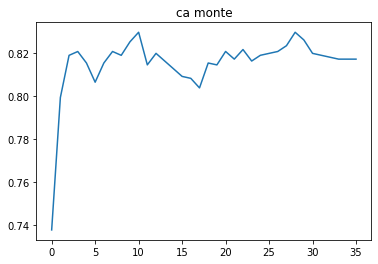

In [161]:
result = []
cv_scores = []
for i in range(1,37):
    pca = PCA(n_components=i)
    pca.fit(data)
    result.append(np.sum(pca.explained_variance_ratio_))
    X_data = pca.transform(data)
    cv_scores.append(np.mean(cross_val_score(clf,X_data,y_obs,scoring='accuracy')))
    
    
#plt.plot(result);
#plt.title("ca monte");

plt.plot(cv_scores);
plt.title("ca monte");

pca_20d = PCA(n_components=20) # 90% explained
pca_20d.fit(data)

pca_5d = PCA(n_components=5) # 50% explained
pca_5d.fit(data)

X_data20 = pca_20d.transform(data)

X_data5 = pca_5d.transform(data)


scores_20 = cross_val_score(clf,X_data20,y_obs,scoring='accuracy')
scores_5 = cross_val_score(clf,X_data5,y_obs,scoring='accuracy')
print(np.mean(scores_20))
print(np.mean(scores_5))

<br>
<font size=7 color=#009999> 2. Kmeans </font> <br><br> 

<br>
<font size=5 color=#009999> 2.1 Load data </font> <br>
</font>

In this **clustering** exercise, we are going to use the well-known [iris](https://archive.ics.uci.edu/ml/datasets/iris) dataset.
<div class="alert alert-warning">
    Let's start with a bit of EDA: print the features <code>X</code> and labels <code>y</code>, check that there is no missing features or labels. Then, scale the data using your favorite scaler. 
</div>



In [162]:
# Idea from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

from sklearn.datasets import load_iris
from sklearn.preprocessing import scale

np.random.seed(42)  # For reproductibility

iris = load_iris()
X = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
y = pd.Series(data=iris["target"])


data_scaled = preprocessing.scale(X)

n_class = len(iris["target_names"])
n_samples = len(X)
n_features = len(iris["feature_names"])


print(
    "n_class: %d, \t n_samples: %d, \t n_features: %d"
    % (n_class, n_samples, n_features)
)

n_class: 3, 	 n_samples: 150, 	 n_features: 4


<br>
<font size=5 color=#009999> 2.2 Feature selection </font> <br>
</font>

<div class="alert alert-warning">
In order to simplify vizualization, use a simple linear regression model to select the <b>three most important features</b>, via the importance of their coefficient in the linear regressor.

Assign the selected feature matrix to the variable <code>data</code>.
</div>

In [163]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(data_scaled,y)

idx_selected = [0,2,3]
data = data_scaled[:,idx_selected]

<br>
<font size=5 color=#009999> 2.3 Visualization </font> <br>
</font>
<div class="alert alert-warning">
Vizualize the data with the following code. Which clusters will be the easier to detect? Comment on the importance of the number of labels.
</div>

In [164]:
import plotly.express as px
import pandas as pd
import re

df = px.data.iris()


data_df = pd.DataFrame(data, columns=X.columns[idx_selected])
new_name = {col: re.sub("\s\(cm\)", " (scaled)", col) for col in X.columns}
data_df.rename(columns=new_name, inplace=True)

fig = px.scatter_3d(
    data_df, x=data_df.columns[0], y=data_df.columns[1], z=data_df.columns[2], color=y
)
fig.show()

<br>
<font size=5 color=#009999> 2.4 Clustering with Kmeans</font> <br></font>

<div class="alert alert-warning">

Use the sklearn KMeans to obtain the three clusters. Compare two initializations: `k-means++` and `random`. Compare a single initialization with 5 and 10 different initializations.
</div>
    
You can use the helping function `bench_k_means` to benchmark the different initializations.

The different metrics are explained in <a href="Metrics.pdf">Metrics.pdf</a>.


In [169]:
from time import time

from sklearn import metrics
from sklearn.cluster import KMeans

print(82 * "_")
print("init\t\ttime\tinertia\tARI\tsilhouette")


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print(
        "%-9s\t%.2fs\t%.3f\t%.3f\t%.3f"
        % (
            name,
            (time() - t0),
            estimator.inertia_,
            metrics.adjusted_rand_score(y, estimator.labels_),
            metrics.silhouette_score(
                data_scaled,
                estimator.labels_,
                metric="euclidean",
                sample_size=n_samples,
            ),
        )
    )

kmeans = [KMeans(n_clusters=3,init=init,n_init=n_init) for init in ('k-means++', 'random') for n_init in (1,5,10)]
for m in kmeans:
    bench_k_means(m,"1-2-3-kmeans++",data)



__________________________________________________________________________________
init		time	inertia	ARI	silhouette
1-2-3-kmeans++	0.00s	63.127	0.715	0.444
1-2-3-kmeans++	0.01s	63.127	0.715	0.444
1-2-3-kmeans++	0.04s	63.041	0.673	0.442
1-2-3-kmeans++	0.00s	63.210	0.642	0.427
1-2-3-kmeans++	0.01s	63.127	0.715	0.444
1-2-3-kmeans++	0.01s	63.041	0.673	0.442


<div class="alert alert-warning">
    
Use the function `plot_diff_cluster` from the `helping_functions` to visualize where your clustering fails, e.g., <br><br>
<code>plot_diff_cluster(y, y_pred, data_df)</code>. <br><br>
Comments on your observations.
</div>

In [166]:
from helping_functions import plot_diff_cluster
for m in kmeans:
    plot_diff_cluster(y, m.predict(data), data_df)

<br>
<font size=5 color=#009999> 2.5 Further vizualization: PCA to the rescue </font> <br>
</font>

Assume we would like to further decrease the dimensionality of our dataset to represent it in 2D. We could also use feature selections and only keep two features, but this is equivalent to discard 50% of the data. This would be even worse for a real dataset with dozens or hundreds of features.

<div class="alert alert-warning">

Use PCA to reduce the dimensionality of the dataset to two and perform the kmeans on
    <ol>
        <li>the initial (4D) dataset;
        <li>the reduced (2D) dataset.
    </ol>

Compare both models. <br>You can also visualize the clustering <b>in 2D case</b> using function <code> visualize_k_means </code> from <code> helping_functions.py </code>
    
</div>


In [170]:
# todo simon
from helping_functions import visualize_k_means

# On initial data
bench_k_means(
    KMeans(init="k-means++", n_clusters=n_class, n_init=10),
    name="k-means++ Initial",
    data=data_scaled,
)

# #############################################################################
# Visualize the results on PCA-reduced data


reduced_data = ...
kmeans = ...


kmeans.fit(reduced_data)
bench_k_means(
    KMeans(init="k-means++", n_clusters=n_class, n_init=10),
    name="k-means++ 10",
    data=reduced_data,
)
visualize_k_means(reduced_data, kmeans)

k-means++ Initial	0.02s	139.825	0.610	0.459


AttributeError: 'ellipsis' object has no attribute 'fit'

Remark: this exercise is inspired from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html.
